In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
### Clustering 
def Clustering(centroids,img):
    b = []
    c = []
    for i in range(len(img)):
        for j in range(len(img[0])):
            a = []
            for k in range(len(centroids)):
                a.append(np.linalg.norm(centroids[k]-img[i][j]))
            b.append(a.index(min(a)))
            c.append(img[i][j])
    return np.array(b),(np.array(c,dtype=float))

In [4]:
### Centroid for new cluster
def centroid(b,c,K,points_p_clus):
    cent = 0
    cent1 = []
    for j in range(K):
        cent = np.mean(c[np.argwhere(b==j)],axis=0)
        cent1.append(cent)
    return np.array(cent1)

In [5]:
def Cluster_plotting(centroids,img,cluster_index):
    b = []
    c = []
    d = np.full(img.shape,0)
    for i in range(len(img)):
        for j in range(len(img[0])):
            a = []
            for k in range(len(centroids)):
                a.append(np.linalg.norm(centroids[k]-img[i][j]))
            if a.index(min(a)) == cluster_index:
                d[i][j] = img[i][j]
#     print(d[20][55])
    plt.imshow(d)

In [6]:
### Access the image
pic = Image.open('wildlife-bears2.jpg')
img = np.array(pic)

In [7]:
### Asking inputs
print("Give number of clusters :")
K = int(input())
print("Give threshold E :")
E = float(input())

### Initialize random centroids
### The way im initializing the centroids is a bit bizzare 
### I'm choosing K [i,j] pixels which are a part of gaussian applied with standard deviation (min(width,height)/10)
### Also, randomly picking pixels is causing issues sometimes.

Cent = []
for i in range(K):
    (w,h)=int(np.random.normal(len(img)/2,len(img)/10)),int(np.random.normal(len(img[0])/2,len(img)/10))
    Cent.append(img[w][h])
# Cent = np.array([[37,35,255],[215,0,24],[0,221,255]])

Give number of clusters :
2
Give threshold E :
1


In [8]:
b,c = Clustering(Cent,img)

In [9]:
print(b.shape,c.shape)
points_per_cluster = []
for i in range(K):
    points_per_cluster.append(np.count_nonzero(b==i))
print(points_per_cluster)

(197450,) (197450, 3)
[138897, 58553]


In [10]:
# New_Cent = centroid(b,c,K,points_per_cluster)
# print(New_Cent)

In [11]:
New_Cent = []
diff = E+1
while(diff>E):
    b,c = Clustering(Cent,img)
    points_per_cluster = []
    for i in range(K):
        points_per_cluster.append(np.count_nonzero(b==i))
    New_Cent = centroid(b,c,K,points_per_cluster)
    diff = np.linalg.norm(New_Cent-Cent)
    print(diff)
    Cent = New_Cent

258.98791526462344
36.603150301224666
7.5827922075166585
4.69640996054719
3.6594179005934153
2.8321196162515556
2.268283899828228
1.8270070595638896
1.4207574791581161
1.0623246843736192
0.8194727661864228


In [12]:
points_per_cluster = []
for i in range(K):
    points_per_cluster.append(np.count_nonzero(b==i))
print(points_per_cluster)

[66979, 130471]


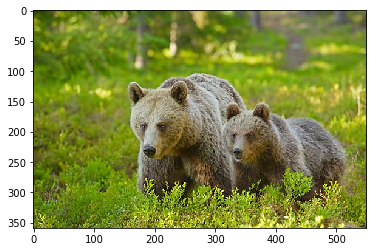

In [13]:
plt.imshow(img)

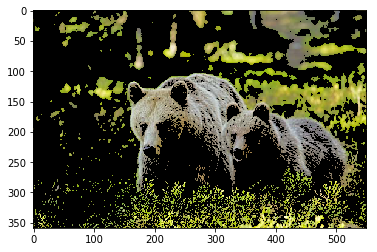

In [15]:
Cluster_plotting(Cent,img,0)

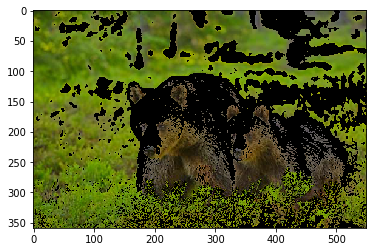

In [16]:
Cluster_plotting(Cent,img,1)